## Melanoma Assigment - CNN
<font color = red> **-by Kishore promod RB** </font>



Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [14]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [15]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [17]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [18]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [19]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [20]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [21]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

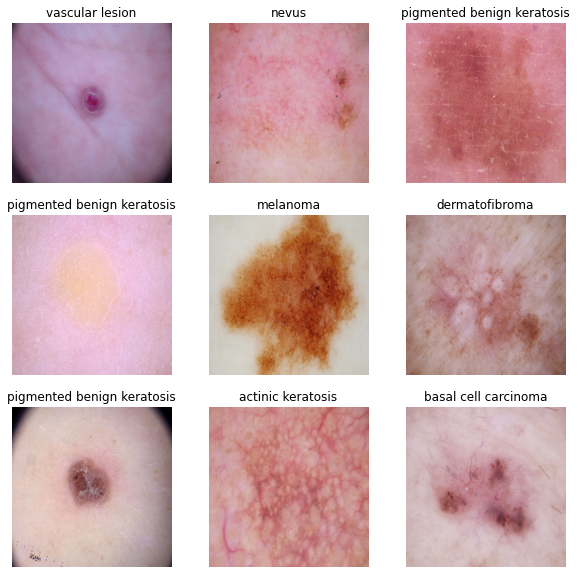

In [22]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [24]:
### Your code goes here
num_classes = 9

model_0 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),

  #first conv layer
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  #second conv layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  #third conv layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  # flatten and put a fully connected layer
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),

  # softmax layer
  tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [25]:
### Todo, choose an appropirate optimiser and loss function
model_0.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

### Train the model

In [26]:
epochs = 20
history = model_0.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 520s 2s/step - loss: 1.9820 - accuracy: 0.2846 - val_loss: 1.6531 - val_accuracy: 0.4072
Epoch 2/20
56/56 [==============================] - 2s 36ms/step - loss: 1.6094 - accuracy: 0.4269 - val_loss: 1.4823 - val_accuracy: 0.4653
Epoch 3/20
56/56 [==============================] - 2s 36ms/step - loss: 1.4613 - accuracy: 0.4727 - val_loss: 1.4809 - val_accuracy: 0.5078
Epoch 4/20
56/56 [==============================] - 2s 36ms/step - loss: 1.4382 - accuracy: 0.4961 - val_loss: 1.3658 - val_accuracy: 0.5213
Epoch 5/20
56/56 [==============================] - 2s 36ms/step - loss: 1.2691 - accuracy: 0.5552 - val_loss: 1.4126 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 2s 36ms/step - loss: 1.2539 - accuracy: 0.5502 - val_loss: 1.3190 - val_accuracy: 0.5436
Epoch 7/20
56/56 [==============================] - 2s 36ms/step - loss: 1.1746 - accuracy: 0.5686 - val_loss: 1.4059 - val_accuracy: 0.5436
Epoch 8/20
56

In [27]:
model_0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 64)       

### Visualizing training results

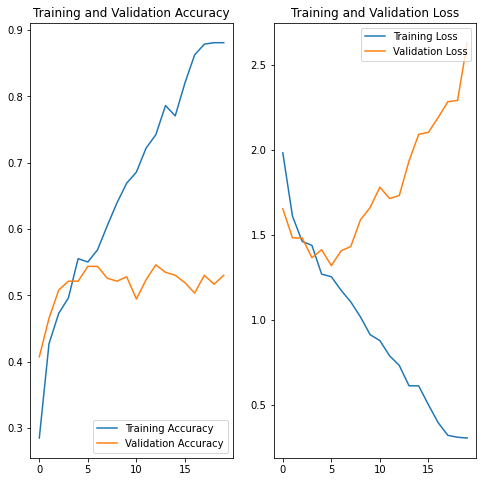

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

####**Yes, Model seems to be Overfitting.**<br>
#### Training = 88% and validation = 53%


### Write your findings here

In [29]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.9.2


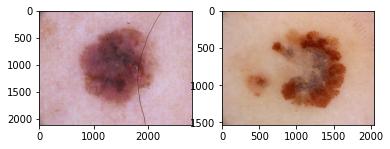

In [30]:
# Importing Image module from PIL package 
from PIL import Image 
import PIL 
  
# creating a image object (main image) 
im1 = Image.open("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000139.jpg") 
im2 = Image.open("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000150.jpg") 

plt.subplot(1, 2, 1)
plt.imshow(im1)

plt.subplot(1, 2, 2)
plt.imshow(im2)
# save a image using extension
#im1 = im1.save("geeks.jpg")

In [31]:
from google.colab import files
upoaded=files.upload()


Saving ISIC_0000145.jpg to ISIC_0000145.jpg


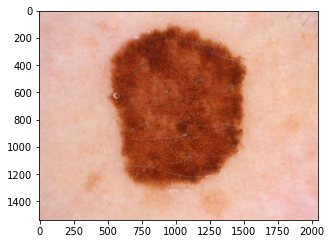

In [34]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
pic = imageio.imread ("ISIC_0000145.jpg")

plt.figure(figsize =(5,5))
plt.imshow(pic)


In [36]:
IMG_SIZE = 180
  
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

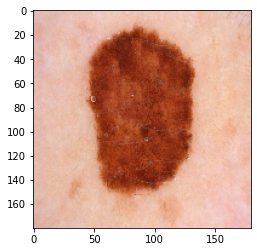

In [37]:
result = resize_and_rescale(pic)
_ = plt.imshow(result)


In [38]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 0.9957881


In [39]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
    
])


In [40]:
# Add the image to a batch.
image = tf.cast(tf.expand_dims(pic, 0), tf.float32)

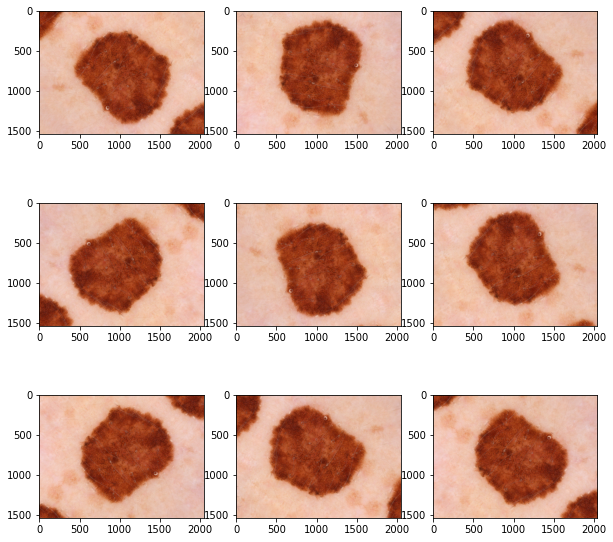

In [41]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("on")

## Inversion

In [42]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [43]:
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

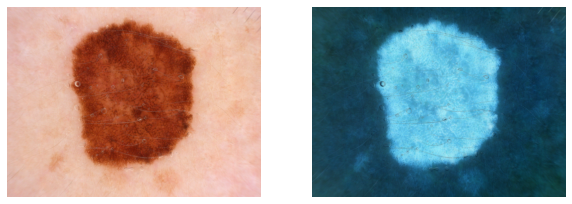

In [44]:
plt.figure(figsize=(10, 10))
for i in range(2):
  augmented_image = random_invert(image)
  ax = plt.subplot(2, 2, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [45]:
## You can use Dropout layer if there is an evidence of overfitting in your findings


### Your code goes here
num_classes = 9

model_1 = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  tf.keras.layers.Rescaling(1./255),  
    
  #first conv layer
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  #second conv layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  #third conv layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
    
  #Add Dropout layer (50%)
  tf.keras.layers.Dropout(0.5),  
    
  # flatten and put a fully connected layer
  tf.keras.layers.Flatten(),
    
  #Add Dropout layer (25%)
  tf.keras.layers.Dropout(0.25), 
  tf.keras.layers.Dense(256, activation='relu'),

  # softmax layer
  tf.keras.layers.Dense(num_classes, activation = 'softmax')
])




In [46]:
model_1.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [47]:
epochs = 20
history = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 39ms/step - loss: 2.1029 - accuracy: 0.2020 - val_loss: 1.9199 - val_accuracy: 0.2931
Epoch 2/20
56/56 [==============================] - 2s 36ms/step - loss: 1.8593 - accuracy: 0.3069 - val_loss: 1.8393 - val_accuracy: 0.3311
Epoch 3/20
56/56 [==============================] - 2s 36ms/step - loss: 1.6587 - accuracy: 0.4007 - val_loss: 1.5606 - val_accuracy: 0.4094
Epoch 4/20
56/56 [==============================] - 2s 37ms/step - loss: 1.6044 - accuracy: 0.4230 - val_loss: 1.5417 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 2s 36ms/step - loss: 1.4776 - accuracy: 0.4827 - val_loss: 1.4578 - val_accuracy: 0.5145
Epoch 6/20
56/56 [==============================] - 2s 36ms/step - loss: 1.4273 - accuracy: 0.5106 - val_loss: 1.4356 - val_accuracy: 0.5257
Epoch 7/20
56/56 [==============================] - 2s 36ms/step - loss: 1.3793 - accuracy: 0.5173 - val_loss: 1.4092 - val_accuracy: 0.5257
Epoch 8/20
56

In [48]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 64)       

### Visualizing the results

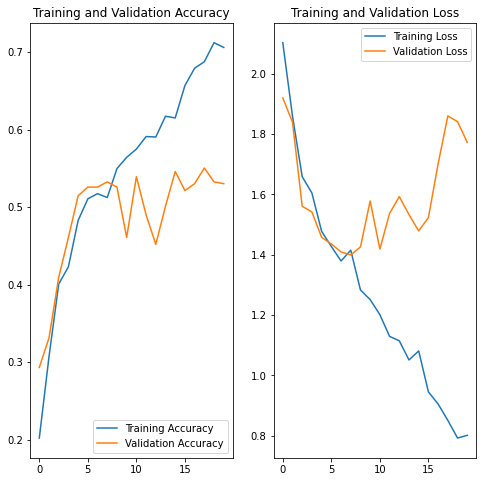

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
### Your code goes here
num_classes = 9

model_2 = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier
  tf.keras.layers.Rescaling(1./255),

    
  #first conv layer
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  

  #second conv layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  #third conv layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  tf.keras.layers.MaxPooling2D(),
    
  #fourth conv layer
  tf.keras.layers.Conv2D(128, (3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  tf.keras.layers.MaxPooling2D(),
    
  #Add Dropout layer (30%)
  tf.keras.layers.Dropout(0.3),  
    
  # flatten and put a fully connected layer
  tf.keras.layers.Flatten(),
    
  #Add Dropout layer (25%)
  tf.keras.layers.Dropout(0.25), 
  tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)),

  # softmax layer
  tf.keras.layers.Dense(num_classes, activation = 'softmax')
])


In [51]:
model_2.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [52]:
epochs = 20
history = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 52s 72ms/step - loss: 2.5541 - accuracy: 0.1959 - val_loss: 2.2375 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 4s 66ms/step - loss: 2.1503 - accuracy: 0.2360 - val_loss: 2.0039 - val_accuracy: 0.2908
Epoch 3/20
56/56 [==============================] - 4s 65ms/step - loss: 1.9243 - accuracy: 0.3030 - val_loss: 1.8534 - val_accuracy: 0.3333
Epoch 4/20
56/56 [==============================] - 4s 64ms/step - loss: 1.8577 - accuracy: 0.3382 - val_loss: 1.7601 - val_accuracy: 0.3758
Epoch 5/20
56/56 [==============================] - 4s 65ms/step - loss: 1.7365 - accuracy: 0.3655 - val_loss: 1.8332 - val_accuracy: 0.3490
Epoch 6/20
56/56 [==============================] - 4s 64ms/step - loss: 1.7327 - accuracy: 0.3783 - val_loss: 1.6449 - val_accuracy: 0.4586
Epoch 7/20
56/56 [==============================] - 4s 65ms/step - loss: 1.6009 - accuracy: 0.4347 - val_loss: 1.5545 - val_accuracy: 0.4787
Epoch 8/20
5

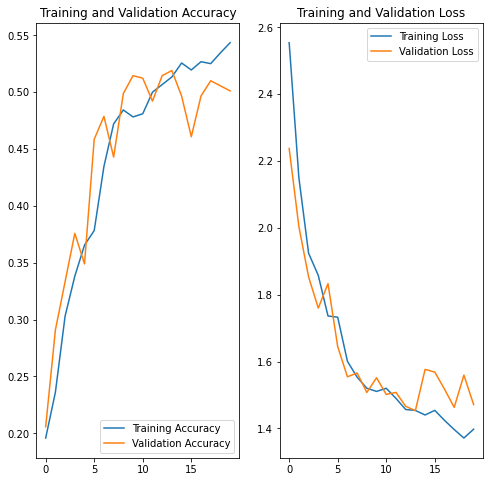

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 86, 86, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                 

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

* Overfitting is resolved but the model accuracy in both train and test came down. Simply the model is underfitting.

* Since the training and validation accuracy is 50-60%. Now we need to improve the accuracy. 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [55]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


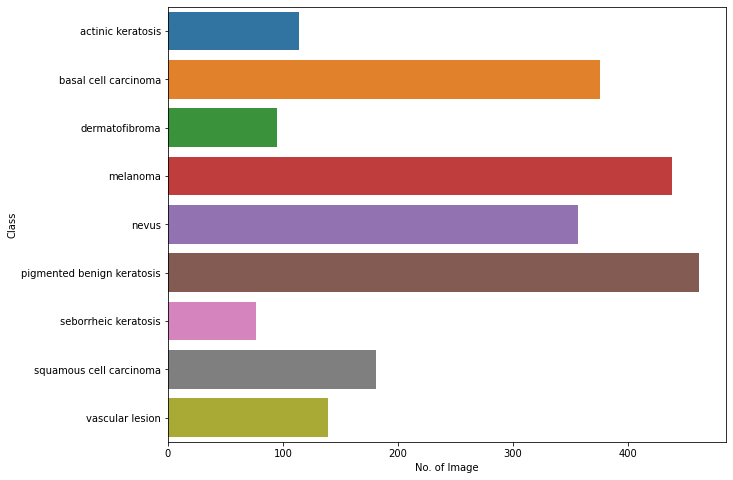

In [56]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

#### **Todo:** Write your findings here: <br>
#### Which class has the least number of samples? <br>
* seborrheic keratosis = **77 images**
* dermatofibroma = **95 images**

#### Which classes dominate the data in terms proportionate number of samples? <br>
* pigmented benign keratosis = **462 images** <br>
 

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [57]:
# Install a pip package in the current Jupyter kernel
import warnings
warnings.filterwarnings('ignore')
import sys

In [58]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
path_to_training_dataset= "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F50E64509D0>: 100%|██████████| 500/500 [00:18<00:00, 26.68 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5164C05C50>: 100%|██████████| 500/500 [00:20<00:00, 24.53 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5154415550>: 100%|██████████| 500/500 [00:22<00:00, 22.56 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F516461FED0>: 100%|██████████| 500/500 [01:41<00:00,  4.93 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F515444EF50>: 100%|██████████| 500/500 [01:29<00:00,  5.56 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F50E6450F50>: 100%|██████████| 500/500 [00:18<00:00, 27.18 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F50E607DE50>: 100%|██████████| 500/500 [00:40<00:00, 12.30 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F50FC5C4F50>: 100%|██████████| 500/500 [00:17<00:00, 29.02 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F51503E15D0>: 100%|██████████| 500/500 [00:18<00:00, 27.35 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [67]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [68]:
#path_list = [x for x in glob(os.path.join(data_dir_train,'*','output','*.jpg', recursive=True))]
#  print(path_list)

path_list = [x for x in glob.glob(os.path.join(data_dir_train,'*','output','*.jpg'),recursive=True)]
path_list

#name for name in glob.glob(os.path.join(data_dir_train,'*','output','*.jpg',), recursive=True):
#  print(name)



4500

In [70]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train,'*','output','*.jpg'), recursive = True)]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [71]:
path_list_new = path_list

In [72]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [73]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [74]:
new_df = df.append(df2)

In [75]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [76]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [77]:
data_dir_train="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size =(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [78]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [79]:
BatchNormalization = tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer='zeros',
    gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones',
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
)

In [80]:
### Your code goes here
num_classes = 9

model_3 = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier
  tf.keras.layers.Rescaling(1./255),

    
  #first conv layer
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  

  #second conv layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  #third conv layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  tf.keras.layers.MaxPooling2D(),
    
  #fourth conv layer
  tf.keras.layers.Conv2D(128, (3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  tf.keras.layers.MaxPooling2D(),
    
  #Add Dropout layer (30%)
  tf.keras.layers.Dropout(0.3),  
    
  # flatten and put a fully connected layer
  tf.keras.layers.Flatten(),
    
  #Add Dropout layer (25%)
  tf.keras.layers.Dropout(0.25), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)),

  # softmax layer
  tf.keras.layers.Dense(num_classes, activation = 'softmax')
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [81]:
### Todo, choose an appropirate optimiser and loss function
model_3.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

#### **Todo:**  Train your model

In [82]:
epochs = 35
history = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 36s 202ms/step - loss: 2.6418 - accuracy: 0.3244 - val_loss: 2.7813 - val_accuracy: 0.1552
Epoch 2/30
169/169 [==============================] - 34s 193ms/step - loss: 2.1001 - accuracy: 0.3874 - val_loss: 2.5223 - val_accuracy: 0.2591
Epoch 3/30
169/169 [==============================] - 33s 190ms/step - loss: 1.8546 - accuracy: 0.4102 - val_loss: 1.8451 - val_accuracy: 0.3935
Epoch 4/30
169/169 [==============================] - 33s 188ms/step - loss: 1.7441 - accuracy: 0.4279 - val_loss: 2.0056 - val_accuracy: 0.3667
Epoch 5/30
169/169 [==============================] - 33s 189ms/step - loss: 1.6770 - accuracy: 0.4327 - val_loss: 1.7580 - val_accuracy: 0.4462
Epoch 6/30
169/169 [==============================] - 38s 217ms/step - loss: 1.6220 - accuracy: 0.4609 - val_loss: 1.6145 - val_accuracy: 0.4595
Epoch 7/30
169/169 [==============================] - 33s 190ms/step - loss: 1.5442 - accuracy: 0.4831 - val_loss: 1.3945 - val_ac

#### **Todo:**  Visualize the model results

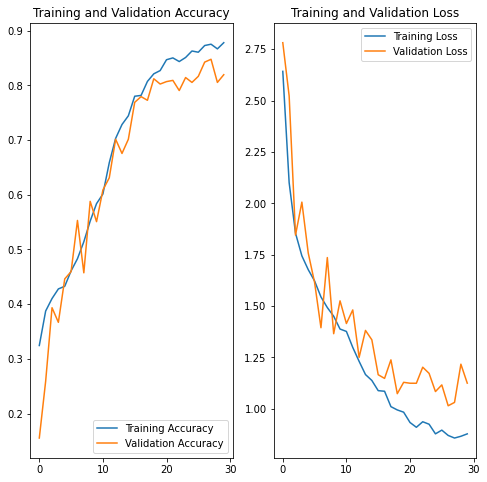

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [84]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 conv2d_16 (Conv2D)          (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 88, 88, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 86, 86, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                 

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#Conclusion: 

Model_3 showed good accuracy in both train as well as validation. L2 regularization + batch normalization + dropout + one addition layer helped model to become generalized and penalized validation and training loss greatly 


## Model and its differences

Model_0 = Overfitting was found <br>
Model_1(Dropout) = Overfitting resolved but goal is to increase underfitting<br>
Model_2(Dropout + L2 regularization) = Underfitting resolved, model became generalized after applying L2
Model_3(Dropout + L2 regularization + Batch normalization) = more generalized model, improved accuracy. 

## Did class rebalance help?

Yes it did!, Class reimbalance played major role in improving the accuracy. 